# Importing Libraries

In [121]:
import json
import nltk 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.wrappers import LdaMallet
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import pyLDAvis.gensim_models as gensimvis
import numpy as np
import pandas as pd
import statistics
import os
from collections import Counter, OrderedDict
import plotly.express as px
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from pprint import pprint
import plotly.graph_objects as go
import re
from string import ascii_letters, digits
import matplotlib.colors as mcolors
from gensim.models.ldamodel import LdaModel
import seaborn as sns
from plotly.offline import plot
import chart_studio.plotly as py
import chart_studio
from sklearn.manifold import TSNE
sns.set()

/opt/conda/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [122]:
import json
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from gensim.utils import simple_preprocess
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from string import ascii_letters, digits

In [123]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
with open('malcolm_fraser_transcripts_edited.json') as json_file:
    frasor_transcripts=json.load(json_file)

In [5]:
dates=[transcript['metadata']['Date'] for transcript in frasor_transcripts]
dates=[date.replace('c','1/01/')for date in dates] #Brute date fix (Only for the time being)

In [6]:
years=[int(date.split('/')[-1]) for date in dates]

In [7]:
file_names=[transcript['file_name'].split('/')[1] for transcript in frasor_transcripts]

In [8]:
data=[transcript['text'] for transcript in frasor_transcripts] #do we need to do cleaning? Build an Autocorrection Model

# Initial Visualisation


## Time Series Visualisation 1

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



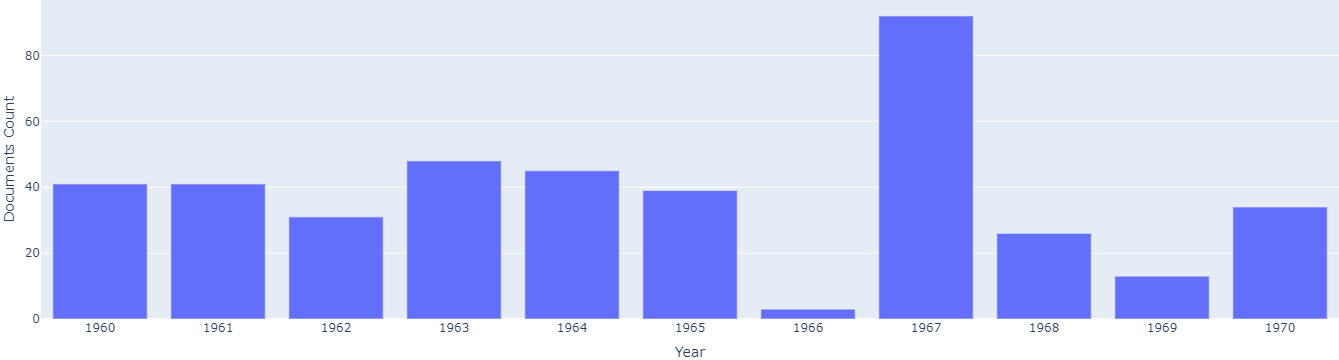

In [124]:
df_time=pd.read_csv("/home/jovyan/work/kabir_code/fraser_dash_app/home/dash_apps/finished_apps/wrangled_data/timesdist.csv")
df_time_focus=df_time[df_time['Year'].isin(list(range(1960,1971,1)))]
figure=px.bar(df_time_focus, x='Year', y='Documents Count').update_layout(margin={"r": 0, "t":0, "l": 0, "b": 0},xaxis=dict(tickmode='linear'),height=300,width=800)
figure.show()

In [9]:
chart_studio.tools.set_credentials_file(username='kabirmanandharsth', api_key='R9RcAt3DGePE9FuPOfhu')

In [10]:
py.plot(figure, filename = 'document-frequency', auto_open=True)

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/11/'

## Time Line Visualisations

In [11]:
df_timeline=pd.read_csv("/home/jovyan/work/kabir_code/fraser_dash_app/home/dash_apps/finished_apps/data/Fraser_timeline.csv")

In [12]:
relevant_years=[date for date in list(df_timeline["Date"]) if int(date.replace(' to ','-').split('-')[2]) in list(range(1960,1971,1))]

In [13]:
df_timeline_relevant=df_timeline[df_timeline["Date"].isin(relevant_years)]
df_timeline_relevant

,Date,Event
8,15-March-1962 to 16-March-1966,Member of the Parliamentary Joint Committee on...
9,01-May-1964 to 01-July-1964,Awarded a Leader Grant by the United States De...
10,9-Feb-1965,"Visits Jakarta, Indonesia"
11,26-January-1966 to 28-February-1968,Minister for the Army appointed
12,28-February-1968 to 12-November-1969,Minister for Education and Science and member ...
13,12-November-1969 to 8-March-1971,Minister for Defence appointed
14,01-Jan-1970 to 12-Dec-1970,Visits Singapore to attend the Five Power Mili...


In [14]:
df_timeline_relevant['Start']=[date.split(' to ')[0] for date in df_timeline_relevant['Date']]

/tmp/ipykernel_2378/1152939251.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
end_years=[]
for date in df_timeline_relevant['Date']:
    try:
        end_years.append(date.split(' to ')[1])
    except:
        end_year=date.split(' to ')[0].split('-')[2]
        end_years.append('30-December-'+end_year)

In [16]:
df_timeline_relevant["End"]=end_years

/tmp/ipykernel_2378/1273950466.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df_timeline_relevant['Start']=[str(date.date()) for date in pd.to_datetime(df_timeline_relevant['Start'])]
df_timeline_relevant['End']=[str(date.date()) for date in pd.to_datetime(df_timeline_relevant['End'])]

/tmp/ipykernel_2378/2740826638.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2378/2740826638.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



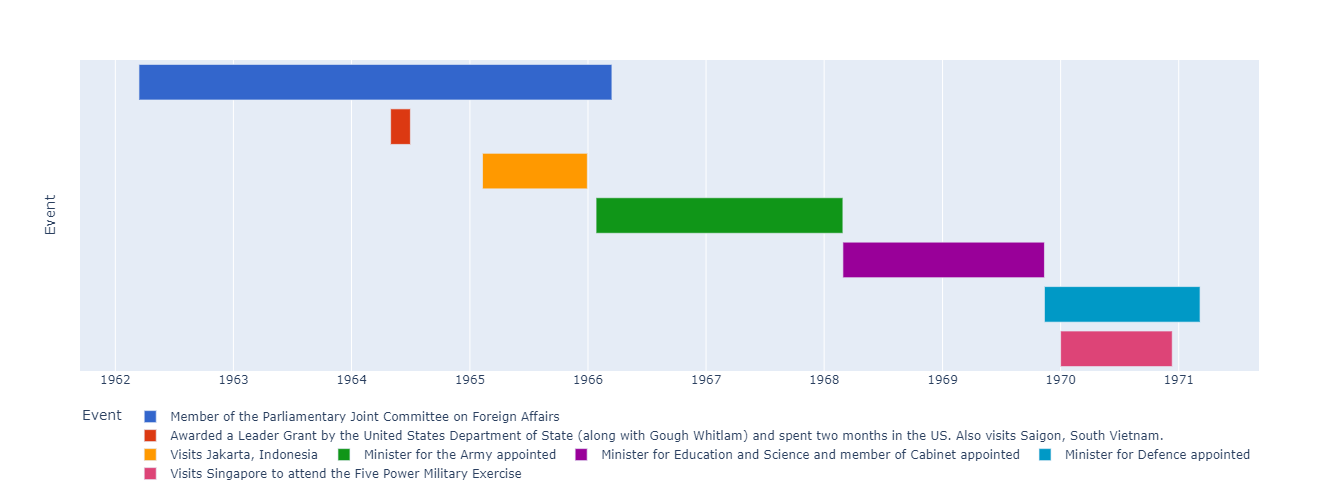

In [92]:
fig = px.timeline(df_timeline_relevant, x_start='Start', x_end='End', y='Event', color='Event',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_traces(textposition='inside',insidetextanchor = 'middle')
fig.update_yaxes(showticklabels=False)
fig.update_layout(legend=dict(orientation='h'),height=500,width=750)
fig.show()

In [90]:
py.plot(fig, filename = 'Fraser-TimeLine', auto_open=True)

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/13/'

# Preprocessing

In [19]:
allowed = set(ascii_letters + ' ')
def preprocess_doc(doc):
    return ["".join(filter(allowed.__contains__,word)).lower() for word in doc.split(" ") if "".join(filter(allowed.__contains__,word))]

In [21]:
data_stream=[preprocess_doc(doc) for doc in data]

## Finding the relevant bi-grams and tri-grams from the corpus

In [22]:
bigram = gensim.models.Phrases(data_stream, min_count=50, threshold = 100)
trigram = gensim.models.Phrases(bigram[data_stream], threshold =100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [23]:
bigrams=sorted([ngrams.decode('utf-8') for ngrams, _ in bigram.vocab.items() if '_' in ngrams.decode('utf-8')])
processed_bigrams=sorted(list(set([bigram for bigram in ["".join(filter(allowed.__contains__,bigram.replace("_"," "))).lstrip() for bigram in bigrams] if bigram])))

In [24]:
with open('american_spellings.json','r') as json_file:
    normalising_dict=json.load(json_file)

In [25]:
def normalise_spelling(word):
    if word in normalising_dict:
        return normalising_dict[word]
    else:
        return word

## Preprocessing Function

In [26]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# get stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')

def process_words(texts, stop_words=stop_words, use_pos_tag=True, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens,normalise accent, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[normalise_spelling(word) for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    first_text=set(texts[0])
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    
    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        if use_pos_tag:
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
        else:
            texts_out.append([token.lemma_ for token in doc]) #No filtering
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [27]:
data_ready_all_tags = process_words(data,use_pos_tag=False) # using all parts of speech 

## Forming vocabulary and analysis on it

In [28]:
def form_corpus(data):
    id2word = corpora.Dictionary(data)
    print('Total Vocabulary Size:', len(id2word))
    corpus = [id2word.doc2bow(text) for text in data]
    dict_corpus = {}
    for i in range(len(corpus)):
      for idx, freq in corpus[i]:
        if id2word[idx] in dict_corpus:
          dict_corpus[id2word[idx]] += freq
        else:
          dict_corpus[id2word[idx]] = freq

    dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])
    return (id2word,dict_df)

In [29]:
id2word_all_tags,dict_df_all_tags=form_corpus(data_ready_all_tags)

Total Vocabulary Size: 8095


/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



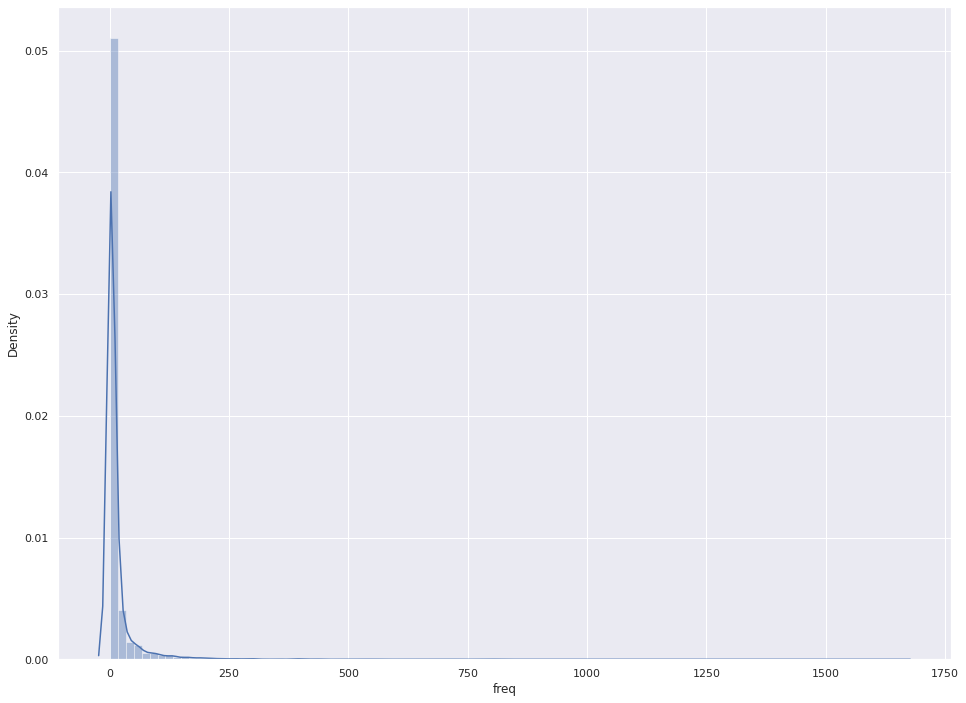

In [34]:
plt.figure(figsize=(16,12))
sns.distplot(dict_df_all_tags['freq'], bins=100);

In [30]:
id2word_all_tags.filter_extremes(no_below=10, no_above=0.5)
print('Total Vocabulary Size:', len(id2word_all_tags))

Total Vocabulary Size: 1425


In [31]:
corpus_all_tags= [id2word_all_tags.doc2bow(text) for text in data_ready_all_tags]

# Modelling

## Build Model

In [37]:
# os.environ.update({'MALLET_HOME':'Notebooks/mallet-2.0.8'}) #necessary for running the model, and get your directory pathing correct
# mallet_path = '/data/kabir_code/Notebooks/mallet-2.0.8/bin/mallet' #get your directory pathing correct!

In [38]:
# ldamallet_all_tags = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_all_tags, num_topics=30, id2word=id2word_all_tags)

## Load Model

In [32]:
ldamallet = pickle.load(open('ldamallet_all_tags_60_grams.pkl','rb'))

## Model Ananlysis

In [33]:
def format_lda_mallet(lda_model,weights=True):
    list_of_topics_info=[]
    for idx,topic in enumerate(lda_model.show_topics(num_topics=-1,num_words=10)):
        topic_info={"Topic":"Topic "+str(idx+1)}
        for word_idx,word in enumerate(topic[1].split(' + ')):
            if weights:
                topic_info["Word "+str(word_idx+1)]=word
            else:
                topic_info["Word "+str(word_idx+1)]="".join(filter(allowed.__contains__,word.split("*")[1].replace("_"," ")))
        list_of_topics_info.append(topic_info)
    return list_of_topics_info

In [34]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )

In [36]:
def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [37]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [38]:
tm_results = ldagensim[corpus_all_tags]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 51,Topic 52,Topic 53,Topic 54,Topic 55,Topic 56,Topic 57,Topic 58,Topic 59,Topic 60
Term1,committee,cost,opposition,export,concern,policy,import,organisation,circumstance,south,...,area,scheme,commonwealth,union,measure,bank,million,public,communist,call
Term2,report,speech,debate,market,affect,future,industry,conference,good,vietnam,...,population,argument,proposal,man,reduce,fund,aid,law,chinese,service
Term3,enquiry,calwell,majority,industry,problem,relation,tariff,federation,recognise,north,...,change,price,propose,lose,employment,money,provide,peace,long,period
Term4,result,general,attack,meat,important,past,legislation,meeting,place,south_east,...,send,buy,work,work,effect,term,programme,support,conflict,provide
Term5,work,thing,week,product,involve,direct,protection,view,term,asia,...,electorate,fact,application,industrial,month,maintain,estimate,life,china,introduce


In [39]:
corpus_topic_collection=[sorted(topics, key=lambda record: -record[1])[:5] for topics in tm_results]

In [40]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )

/tmp/ipykernel_2378/15202417.py:2: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [41]:
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['Text']=data
corpus_topic_df['Year']=years
corpus_topic_df['File_Name']=file_names
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()

Text  \
0    PRESS STATEMENT: MALCOLM FRASER: March 17th,1962 Last week, the Government withstood its first major attack. The vote, as expected, was a close one, 60-59. The first censure motion moved by the Opposition might not be as important as some press reports have led people to believe. The Opposition did not really expect to win. They knew the Government had the numbers. Some leading members of the Opposition are reported to think that there would be more chance of defeating the Government during the Budget session next spring. If the results of this recent censure motion are any guide, I doubt if this is so. The Opposition members who think in this way base their hopes on the belief that the Government's economic measures will not restore the economy to a proper degree of confidence and activity. These hopes, I think, are without foundation. There were very significant up-turns in production in some of our major commodities, especially iron and steel, in January, and in January, the number of motor cars sold were an all- time record for that particular month. The Government measures have now come in behind this up-turn in production that was beginning and will reinforce it, and there is already evidence of renewed confidence and optimism throughout industry. The employment figures should rapidly improve. It is worth noting that the actual number of people in employment has continued to rise throughout the spring and summer months. However, the great numbers of school leavers who registered for work over the Christmas and summer periods was much greater than the increased demand for labour at that time and thus the numbers of unemployed became worse in the months of December and January. The Minister for Labour has confidently predicted that the figure for February will show the greatest drop of any month since the great coal strike of 1949. The future will show whether he is correct or not. I think the Opposition made a cardinal error in their censure motion. They made it difficult for the members of the general public to understand what they were trying to do. The full motion of censure would nearly have filled one of my normal Sunday night talks. The Opposition tried to cover the whole field instead of concentrating on what they believed to be one or two of the weakest points in the Government's perform- ance. They dissipated their attack in every direction. This is, of course, a matter of opinion and a matter of tactics, but if I had been in Opposition under such circumstances I would have tried to emphasise and highlight one or two points and really drive them home to the people. However, this was not done. In making it a wide and unrestricted motion, the Opposition, in fact, tried to re-fight the election of December, 1961. Having gone as far as this, having chosen a broad front for the battle, they should have made quite sure that there were no significant gaps in the censure motion. They did not do this. Quite significantly, the Opposition motion did not mention foreign policy or defence. It neglected these while it mentioned every item of financial and monetary policy; of social policy; of relationships with the States and matters of national development - particularly the development of Northern Australia. Because of this further error in the framing of their censure motion, the Government speakers were able to charge the Opposition with lack of concern for the defence of Australia and for foreign policy in a year in which most vital decisions might be taken in our near north. /2. 4101112 In framing its motion the Opposition had thought that the Government members might show a lack of cohesion and unity, considering the recent reduction in numbers which the Government suffered. This was not so. While the Opposition attack roamed over the whole field that I have mentioned, excluding defence and foreign policy, the defence and counter attack of the Government members showed a strength, a unity and a sense of de

In [42]:
topic_weights = []
for idx, row_list in enumerate(ldagensim[corpus_all_tags]):
    weight_list=[0] * 60
    for i,w in row_list:
        weight_list[i]=w
    topic_weights.append(weight_list)

In [43]:
with open("all_corpus_with_lda.json") as json_file:
    info=json.load(json_file)

topic_weights = []
for i, row_list in enumerate(info):
    topic_weights.append([w for i, w in row_list])

In [44]:
arr = pd.DataFrame(topic_weights).fillna(0).values
topic_num = np.argmax(arr, axis=1)

In [87]:
pd.DataFrame(arr).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.014145,0.011418,0.228528,0.006305,0.008010,0.020279,0.005965,0.003238,0.010736,0.004942,0.002897,0.027778,0.011077,0.007328,0.003238,0.005283,0.019598,0.006646,0.004942,0.003920,0.054703,0.004601,0.007328,0.081288,0.003579,0.007669,0.005283,0.016190,0.070382,0.006646,0.004260,0.012440,0.017553,0.014145,0.004601,0.008350,0.007328,0.013804,0.003579,0.003920,0.009714,0.012781,0.003238,0.003579,0.032209,0.024710,0.005283,0.005965,0.003238,0.005624,0.003579,0.005283,0.002897,0.006987,0.073790,0.006646,0.004260,0.021984,0.003579,0.010736
1,0.004579,0.007631,0.004579,0.005189,0.008242,0.007631,0.008852,0.028999,0.005189,0.013736,0.004579,0.016178,0.004579,0.019231,0.007021,0.007631,0.007631,0.016178,0.005800,0.007631,0.013126,0.005189,0.016789,0.009463,0.050366,0.007631,0.063797,0.010684,0.005800,0.004579,0.075397,0.025336,0.215812,0.007021,0.005189,0.006410,0.005189,0.008852,0.005189,0.007021,0.005189,0.007021,0.005189,0.005800,0.004579,0.007631,0.010073,0.022283,0.005189,0.079060,0.007631,0.024725,0.004579,0.010073,0.007631,0.013126,0.018620,0.005189,0.004579,0.011905
2,0.024232,0.002482,0.014066,0.002246,0.005792,0.003428,0.002719,0.069858,0.002246,0.003428,0.004374,0.004610,0.003191,0.017139,0.002482,0.002482,0.053073,0.078369,0.036288,0.003428,0.004374,0.004137,0.005792,0.007210,0.005083,0.003191,0.002246,0.058511,0.064894,0.008156,0.001773,0.009338,0.002719,0.024704,0.002246,0.014539,0.007210,0.002719,0.003901,0.339362,0.006974,0.002009,0.001773,0.001773,0.006265,0.002246,0.010047,0.002009,0.002246,0.008865,0.002482,0.012884,0.004610,0.007447,0.003191,0.004374,0.003901,0.002955,0.002246,0.003664
3,0.003310,0.014249,0.042458,0.002447,0.009931,0.009931,0.003598,0.013097,0.014249,0.007340,0.016264,0.006189,0.003598,0.003310,0.013961,0.003310,0.004174,0.110391,0.015976,0.004462,0.006477,0.004174,0.003022,0.049367,0.003310,0.003022,0.003022,0.002159,0.024324,0.019142,0.003022,0.005325,0.002447,0.006477,0.037565,0.003310,0.002447,0.002159,0.018854,0.006477,0.007340,0.005325,0.017127,0.004174,0.007916,0.017415,0.003310,0.003022,0.248273,0.007916,0.015976,0.005325,0.004174,0.004462,0.025187,0.003310,0.020294,0.008780,0.079879,0.002447
4,0.003927,0.004218,0.030396,0.002182,0.027487,0.003927,0.002182,0.032723,0.009453,0.006254,0.008581,0.007999,0.007417,0.006545,0.009744,0.024578,0.015561,0.092932,0.007126,0.012653,0.010035,0.014980,0.013525,0.003927,0.007999,0.003636,0.019924,0.004508,0.007417,0.009453,0.002763,0.023997,0.003636,0.056283,0.070535,0.002182,0.002763,0.003054,0.006254,0.007999,0.031850,0.021960,0.033304,0.068208,0.003636,0.007126,0.023124,0.004799,0.054538,0.010617,0.069953,0.005381,0.005963,0.007417,0.002763,0.004508,0.019343,0.005381,0.012944,0.016434


In [ ]:
work/kabir_code/Notebooks/malcolm_fraser_transcripts_edited.json

In [45]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 287 samples in 0.000s...
[t-SNE] Computed neighbors for 287 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 287 / 287
[t-SNE] Mean sigma: 0.118815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.073624
[t-SNE] KL divergence after 1000 iterations: 0.572908


In [46]:
color_coded_df_60=pd.read_csv("../fraser_dash_app/home/dash_apps/finished_apps/data/60_topics_grams COLOUR CODED.csv")

In [47]:
color_coded_df_60_records=color_coded_df_60.to_dict("records")

In [48]:
significant_topics_df=color_coded_df_60.loc[color_coded_df_60['Colour Code'] == 3]
df_talks_urls=pd.read_excel("../fraser_dash_app/home/dash_apps/finished_apps/data/Fraser_talks_urls.xlsx")
corpus_topic_df_subset=corpus_topic_df[["Year","File_Name","Dominant Topic","Contribution %"]]
corpus_topic_df_subset["UDS file title"]=[file_name.replace('-full.txt','') for file_name in corpus_topic_df["File_Name"]]
corpus_topic_df_subset= corpus_topic_df_subset[["Year","UDS file title","Dominant Topic","Contribution %"]]
corpus_topic_df=pd.merge(corpus_topic_df_subset, df_talks_urls[["IMu url","UDS file title","Title (REQUIRED)"]], on="UDS file title")

/tmp/ipykernel_2378/3879627863.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
corpus_topic_collection_all=[sorted(topics, key=lambda record: -record[1]) for topics in tm_results]

In [50]:
corpus_topic_all_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_all_df['Text']=data
corpus_topic_all_df['Year']=years
corpus_topic_all_df['File_Name']=file_names
# corpus_topic_all_df['Topic Weights'] = [item[0]+1 for item in corpus_topic_collection_all]
# corpus_topic_all_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topic_collection_all]

### Scatter Plot Distribution

In [51]:
topic_category_dict={}
for cat,top in zip(list(significant_topics_df["Topic Category"]),list(significant_topics_df["ID"])):
    if top not in topic_category_dict:
        topic_category_dict[top]=cat

tsne_lda_filtered=[]
topic_num_filtered=[]
dominant_topic_category=[]
texts=[]
urls=[]
for tsne,topic,title_name,url in zip(tsne_lda,topic_num,corpus_topic_df["Title (REQUIRED)"],corpus_topic_df["IMu url"]):
    if topic in list(significant_topics_df['ID']):
        tsne_lda_filtered.append(tsne)
        topic_num_filtered.append(topic)
        text_url="<a href="+"\""+url+"\">"+title_name+"</a>"
        texts.append(text_url)
        urls.append(url)
        dominant_topic_category.append(topic_category_dict[topic])

tsne_lda_filtered=np.array(tsne_lda_filtered)


In [52]:
scatter_dicts=[]
for x_dim,y_dim,category,url,text in zip(tsne_lda_filtered[:,0],tsne_lda_filtered[:,1],dominant_topic_category,urls,texts):
    scatter_dicts.append({
        "X_dim":x_dim,
        "Y_dim":y_dim,
        "Category":category,
        "URL":url,
        "Text":text
    })

### Unsure Scatter Plots

In [111]:
records_updated=[]
unsure_idx=1
for record in color_coded_df_60_records:
    if record['Topic Category']=='Unsure':
        record_updated=record
        record_updated["Topic Category"]='Unsure_'+str(unsure_idx)
        record_updated["Colour Code"]=3
        unsure_idx+=1
        records_updated.append(record_updated)
    else:
        records_updated.append(record)   

color_coded_df_60=pd.DataFrame(records_updated)

In [113]:
corpus_topic_all_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_all_df['Text']=data
corpus_topic_all_df['Year']=years
corpus_topic_all_df['File_Name']=file_names
# corpus_topic_all_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topic_collection_all]
corpus_topic_all_df.head()

Text  \
0    PRESS STATEMENT: MALCOLM FRASER: March 17th,1962 Last week, the Government withstood its first major attack. The vote, as expected, was a close one, 60-59. The first censure motion moved by the Opposition might not be as important as some press reports have led people to believe. The Opposition did not really expect to win. They knew the Government had the numbers. Some leading members of the Opposition are reported to think that there would be more chance of defeating the Government during the Budget session next spring. If the results of this recent censure motion are any guide, I doubt if this is so. The Opposition members who think in this way base their hopes on the belief that the Government's economic measures will not restore the economy to a proper degree of confidence and activity. These hopes, I think, are without foundation. There were very significant up-turns in production in some of our major commodities, especially iron and steel, in January, and in January, the number of motor cars sold were an all- time record for that particular month. The Government measures have now come in behind this up-turn in production that was beginning and will reinforce it, and there is already evidence of renewed confidence and optimism throughout industry. The employment figures should rapidly improve. It is worth noting that the actual number of people in employment has continued to rise throughout the spring and summer months. However, the great numbers of school leavers who registered for work over the Christmas and summer periods was much greater than the increased demand for labour at that time and thus the numbers of unemployed became worse in the months of December and January. The Minister for Labour has confidently predicted that the figure for February will show the greatest drop of any month since the great coal strike of 1949. The future will show whether he is correct or not. I think the Opposition made a cardinal error in their censure motion. They made it difficult for the members of the general public to understand what they were trying to do. The full motion of censure would nearly have filled one of my normal Sunday night talks. The Opposition tried to cover the whole field instead of concentrating on what they believed to be one or two of the weakest points in the Government's perform- ance. They dissipated their attack in every direction. This is, of course, a matter of opinion and a matter of tactics, but if I had been in Opposition under such circumstances I would have tried to emphasise and highlight one or two points and really drive them home to the people. However, this was not done. In making it a wide and unrestricted motion, the Opposition, in fact, tried to re-fight the election of December, 1961. Having gone as far as this, having chosen a broad front for the battle, they should have made quite sure that there were no significant gaps in the censure motion. They did not do this. Quite significantly, the Opposition motion did not mention foreign policy or defence. It neglected these while it mentioned every item of financial and monetary policy; of social policy; of relationships with the States and matters of national development - particularly the development of Northern Australia. Because of this further error in the framing of their censure motion, the Government speakers were able to charge the Opposition with lack of concern for the defence of Australia and for foreign policy in a year in which most vital decisions might be taken in our near north. /2. 4101112 In framing its motion the Opposition had thought that the Government members might show a lack of cohesion and unity, considering the recent reduction in numbers which the Government suffered. This was not so. While the Opposition attack roamed over the whole field that I have mentioned, excluding defence and foreign policy, the defence and counter attack of the Government members showed a strength, a unity and a sense of de

In [114]:
topic_category_dict={}
for cat,top in zip(list(significant_topics_df["Topic Category"]),list(significant_topics_df["ID"])):
    if top not in topic_category_dict:
        topic_category_dict[top]=cat

tsne_lda_filtered=[]
topic_num_filtered=[]
dominant_topic_category=[]
texts=[]
urls=[]
for tsne,topic,title_name,url in zip(tsne_lda,topic_num,corpus_topic_df["Title (REQUIRED)"],corpus_topic_df["IMu url"]):
    if topic in list(significant_topics_df['ID']):
        tsne_lda_filtered.append(tsne)
        topic_num_filtered.append(topic)
        text_url="<a href="+"\""+url+"\">"+title_name+"</a>"
        texts.append(text_url)
        urls.append(url)
        dominant_topic_category.append(topic_category_dict[topic])

tsne_lda_filtered=np.array(tsne_lda_filtered)

KeyError: 'Title (REQUIRED)'

In [99]:
scatter_dicts=[]
for x_dim,y_dim,category,url,text in zip(tsne_lda_filtered[:,0],tsne_lda_filtered[:,1],dominant_topic_category,urls,texts):
    scatter_dicts.append({
        "X_dim":x_dim,
        "Y_dim":y_dim,
        "Category":category,
        "URL":url,
        "Text":text
    })

### Scatter Plot Viz 

In [53]:
df_scatter=pd.DataFrame(scatter_dicts)
df_scatter.head()

,X_dim,Y_dim,Category,URL,Text
0,1.475947,-11.233254,Parliament,https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74189,"<a href=""https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74189"">Press statement</a>"
1,15.281390,-5.383839,Portland Wool Sales,https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74192,"<a href=""https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74192"">Portland wool sales conference</a>"
2,-3.581896,-16.350153,South East Asia,https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74195,"<a href=""https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74195"">New Guinea</a>"
3,-0.597510,-5.882089,New Guinea,https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74275,"<a href=""https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74275"">Liberal Party Federal Council</a>"
4,-8.911387,-9.007706,Defence Policy,https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74129,"<a href=""https://gallery.its.unimelb.edu.au/umblumaic/imu.php?request=load&view=details&irn=74129"">Defence programme for Armed Forces</a>"


In [57]:
fig=px.scatter(df_scatter,
               x="X_dim", 
               y="Y_dim", 
               color="Category",
               hover_name="Text",
               custom_data=("URL",),
               height=600,
               width=700)

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



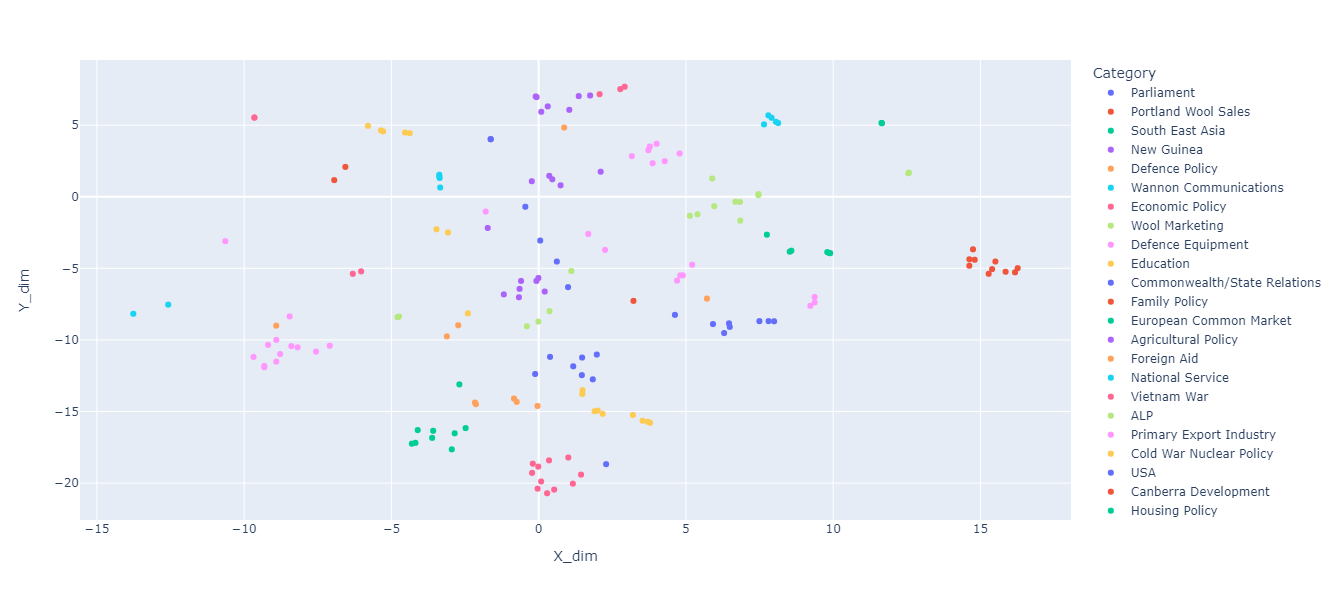

In [58]:
fig.show()

In [57]:
py.plot(fig, filename = 'Fraser Topics', auto_open=True)

'https://plotly.com/~kabirmanandharsth/36/'

In [59]:
# Get HTML representation of plotly.js and this figure
plot_div = plot(fig, output_type='div', include_plotlyjs=True)

# Get id of html div element that looks like
# <div id="301d22ab-bfba-4621-8f5d-dc4fd855bb33" ... >
res = re.search('<div id="([^"]*)"', plot_div)
div_id = res.groups()[0]

In [60]:
# Build JavaScript callback for handling clicks
# and opening the URL in the trace's customdata 
js_callback = """
<script>
var plot_element = document.getElementById("{div_id}");
plot_element.on('plotly_click', function(data){{
    console.log(data);
    var point = data.points[0];
    if (point) {{
        console.log(point.customdata);
        window.open(point.customdata);
    }}
}})
</script>
""".format(div_id=div_id)

In [61]:
# Build HTML string
html_str = """
<html>
<body>
{plot_div}
{js_callback}
</body>
</html>
""".format(plot_div=plot_div, js_callback=js_callback)

In [62]:
with open('scatter_topics_final.html', 'w') as f:
    f.write(html_str)

In [64]:
df_topic_freq=pd.read_csv("/home/jovyan/work//kabir_code/fraser_dash_app/home/dash_apps/finished_apps/data/Frequency_of_topics.csv")

### Topics Histogram

In [86]:
fig=px.bar(df_topic_freq, x='Topic Category', y='Frequency',height=600,width=900)

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



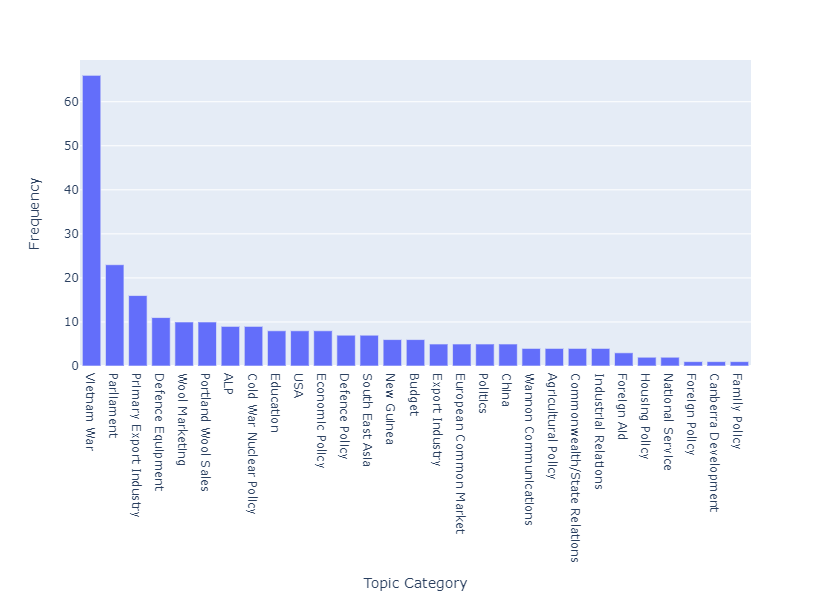

In [87]:
fig.show()

In [88]:
py.plot(fig, filename = 'Fraser Topics', auto_open=True)

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/36/'

### Time Series of all topics

In [93]:
df_dist_uniq_sig=pd.read_csv("/home/jovyan/work/kabir_code/fraser_dash_app/home/dash_apps/finished_apps/data/Significant_uniq_dist.csv")
df_dist_uniq_sig=df_dist_uniq_sig.drop(columns=["Unnamed: 0"])

In [ ]:
df_dist_uniq_sig

,Year,Budget,Cold War Nuclear Policy,Economic Policy,Commonwealth/State Relations,European Common Market,Export Industry,Primary Export Industry,Defence Equipment,Vietnam War,Industrial Relations,Portland Wool Sales,Wannon Communications,Education,China,New Guinea,National Service,Foreign Policy,Family Policy,Defence Policy,Wool Marketing,South East Asia,Foreign Aid,ALP,Agricultural Policy,Parliament,Wannon,Housing Policy,Politics,Canberra Development,USA
0,1961,0.023177,0.023740,0.065083,0.015322,0.034590,0.031154,0.037612,0.006476,0.020895,0.019772,0.035474,0.019537,0.024268,0.018240,0.024712,0.009598,0.020740,0.011999,0.018461,0.012800,0.012610,0.015008,0.019821,0.024038,0.054510,0.012632,0.010297,0.019774,0.025757,0.006531
1,1962,0.018684,0.039232,0.044940,0.022669,0.032744,0.022816,0.048322,0.006951,0.027884,0.007687,0.017555,0.008292,0.005650,0.031662,0.022828,0.007833,0.022778,0.006019,0.026792,0.027495,0.038944,0.008709,0.024763,0.020561,0.069795,0.008370,0.009260,0.025137,0.010663,0.011315
2,1963,0.022909,0.030963,0.021224,0.014669,0.010116,0.014741,0.031494,0.020826,0.027357,0.012328,0.043980,0.007880,0.013931,0.015926,0.013206,0.011239,0.015241,0.022672,0.021601,0.036465,0.027333,0.009713,0.072887,0.016822,0.052722,0.014193,0.009098,0.042936,0.012193,0.013494
3,1964,0.017911,0.018437,0.031675,0.028087,0.016181,0.013306,0.042811,0.028070,0.058120,0.009626,0.009707,0.012405,0.020552,0.013068,0.015493,0.021437,0.019172,0.013621,0.044516,0.020674,0.019737,0.010153,0.025100,0.010957,0.047897,0.008528,0.010425,0.029790,0.009311,0.061049
4,1965,0.023196,0.008689,0.029095,0.012202,0.011220,0.016647,0.021049,0.023070,0.060991,0.027788,0.009469,0.014929,0.019968,0.030735,0.015077,0.030004,0.013826,0.016669,0.042464,0.025327,0.014166,0.014835,0.026258,0.010835,0.061961,0.012025,0.010130,0.038810,0.010496,0.015300
5,1967,0.013617,0.007519,0.019549,0.011465,0.007693,0.008381,0.015317,0.023656,0.300007,0.009769,0.007190,0.021718,0.014876,0.009252,0.010134,0.018798,0.007008,0.014796,0.031552,0.011223,0.008749,0.015203,0.018243,0.013003,0.028808,0.018567,0.010935,0.024143,0.013759,0.008334
6,1968,0.009225,0.008431,0.024224,0.027950,0.009882,0.008456,0.023616,0.008113,0.197862,0.022224,0.007559,0.020426,0.022488,0.009344,0.021894,0.015331,0.037345,0.018213,0.022358,0.006385,0.008136,0.014334,0.026324,0.013572,0.042621,0.022863,0.010647,0.030987,0.014645,0.010296
7,1969,0.007060,0.005218,0.010436,0.005218,0.006446,0.008287,0.010436,0.037139,0.041743,0.004604,0.007673,0.046961,0.062308,0.006446,0.007060,0.007060,0.035298,0.015040,0.090853,0.005832,0.005832,0.005218,0.017802,0.006446,0.088705,0.005218,0.007673,0.022713,0.013198,0.007673
8,1970,0.017142,0.006753,0.023688,0.018068,0.006285,0.006087,0.050650,0.036396,0.085466,0.007115,0.006386,0.024204,0.010738,0.013568,0.007564,0.010657,0.013407,0.009219,0.049865,0.031396,0.005976,0.053686,0.025765,0.014065,0.051885,0.035772,0.063474,0.020142,0.011901,0.009541


/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



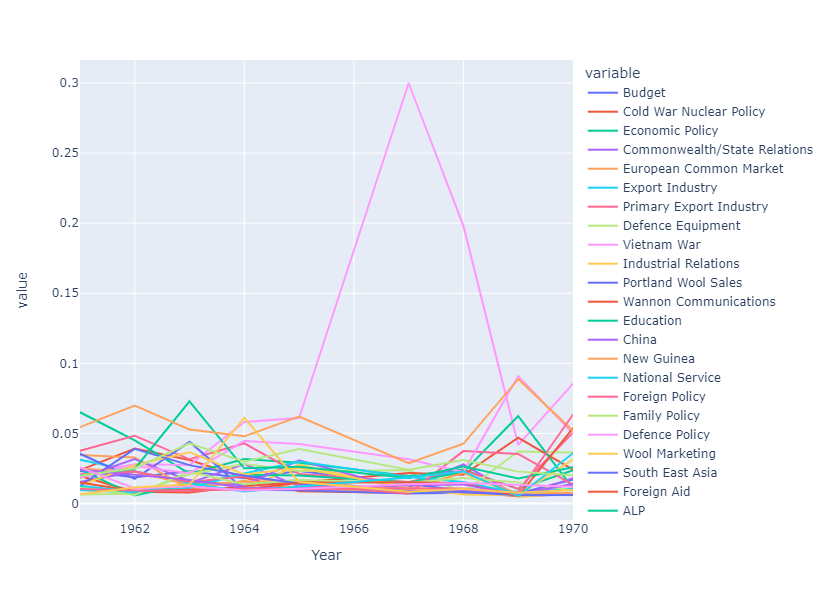

In [101]:
fig=px.line(df_dist_uniq_sig, x='Year', y=df_dist_uniq_sig.columns,height=600,width=750)
fig.show()

In [102]:
py.plot(fig,file_name="60_time_line_topics",auto_open="True")

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/113/'

### Hierarchy Analysis

#### Policy Based Hierarchy

In [103]:
df_hierarchy=pd.read_excel("60_topics_grams COLOUR CODED.xlsx", sheet_name="in")
df_hierarchy.head()

,Level 1 topic,Level 2 topic,Level 3 topic,"Colour code 1=not good, 2=moderate, 3=good",Unnamed: 4,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
0,NaN,NaN,Enquiry Committee,2,0,Topic 1,committee,report,enquiry,result,work,establish,examine,discuss,thing,purpose
1,Malcolm Fraser 60 topic grams,National - politics,ALP,3,1,Topic 2,cost,speech,calwell,general,thing,kind,promise,hard,governor,pay
2,Malcolm Fraser 60 topic grams,National - politics,Parliament,3,2,Topic 3,opposition,debate,majority,attack,week,thing,question,show,move,important
3,Malcolm Fraser 60 topic grams,National - politics,Primary Export Industry,3,3,Topic 4,export,market,industry,meat,product,overseas,butter,beef,dairy,price
4,Malcolm Fraser 60 topic grams,NaN,Unsure,2,4,Topic 5,concern,affect,problem,important,involve,opportunity,importance,individual,return,good


In [113]:
df_hierarchy_theme=pd.read_excel("60_topics_grams COLOUR CODED_Theme.xlsx")
df_hierarchy_theme.head()

,Level 3 topic,Level 2 topic,Possible level 2 topic for unsures,"Colour code 1=not good, 2=moderate, 3=good",Unnamed: 4,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
0,Enquiry Committee,Administration,NaN,2,0,Topic 1,committee,report,enquiry,result,work,establish,examine,discuss,thing,purpose
1,ALP,Politics,NaN,3,1,Topic 2,cost,speech,calwell,general,thing,kind,promise,hard,governor,pay
2,Parliament,Politics,NaN,3,2,Topic 3,opposition,debate,majority,attack,week,thing,question,show,move,important
3,Primary Export Industry,Economics,NaN,3,3,Topic 4,export,market,industry,meat,product,overseas,butter,beef,dairy,price
4,Unsure,NaN,Values,2,4,Topic 5,concern,affect,problem,important,involve,opportunity,importance,individual,return,good


In [105]:
df_hierarchy_relevant=df_hierarchy.loc[df_hierarchy['Colour code 1=not good, 2=moderate, 3=good'] == 3]
df_hierarchy_relevant.head()

,Level 1 topic,Level 2 topic,Level 3 topic,"Colour code 1=not good, 2=moderate, 3=good",Unnamed: 4,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
1,Malcolm Fraser 60 topic grams,National - politics,ALP,3,1,Topic 2,cost,speech,calwell,general,thing,kind,promise,hard,governor,pay
2,Malcolm Fraser 60 topic grams,National - politics,Parliament,3,2,Topic 3,opposition,debate,majority,attack,week,thing,question,show,move,important
3,Malcolm Fraser 60 topic grams,National - politics,Primary Export Industry,3,3,Topic 4,export,market,industry,meat,product,overseas,butter,beef,dairy,price
6,Malcolm Fraser 60 topic grams,National - politics,Export Industry,3,6,Topic 7,import,industry,tariff,legislation,protection,practise,competition,protect,impose,chamber
9,Malcolm Fraser 60 topic grams,International - foreign policy and defense,Vietnam War,3,9,Topic 10,south,vietnam,north,south east,asia,force,vietnamese,war,difficult,attack


In [117]:
df_hierarchy_relevant_theme=df_hierarchy_theme.loc[df_hierarchy_theme['Colour code 1=not good, 2=moderate, 3=good'] == 3]
df_hierarchy_relevant_theme.head()

,Level 3 topic,Level 2 topic,Possible level 2 topic for unsures,"Colour code 1=not good, 2=moderate, 3=good",Unnamed: 4,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
1,ALP,Politics,NaN,3,1,Topic 2,cost,speech,calwell,general,thing,kind,promise,hard,governor,pay
2,Parliament,Politics,NaN,3,2,Topic 3,opposition,debate,majority,attack,week,thing,question,show,move,important
3,Primary Export Industry,Economics,NaN,3,3,Topic 4,export,market,industry,meat,product,overseas,butter,beef,dairy,price
6,Export Industry,Economics,NaN,3,6,Topic 7,import,industry,tariff,legislation,protection,practise,competition,protect,impose,chamber
9,Vietnam War,Politics,NaN,3,9,Topic 10,south,vietnam,north,south east,asia,force,vietnamese,war,difficult,attack


In [107]:
df_hierarchy_relevant["Level 2 topic"]=[topic.split(' -')[0] for topic in df_hierarchy_relevant["Level 2 topic"]]

/tmp/ipykernel_2378/3516142241.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
df_hierarchy_relevant_theme["Level 2 topic"]=[topic.split(' -')[0] for topic in df_hierarchy_relevant_theme["Level 2 topic"]]

/tmp/ipykernel_2378/402395056.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



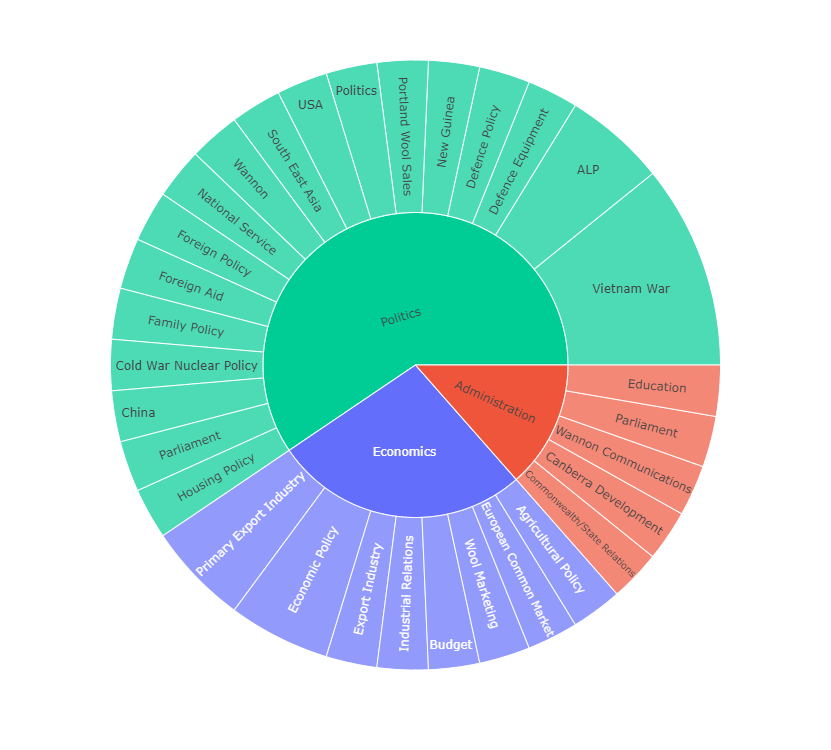

In [119]:
fig = px.sunburst(df_hierarchy_relevant_theme, path=['Level 2 topic', 'Level 3 topic'],  color='Level 2 topic',height=750,width=600)
fig.show()

###### fig = px.sunburst(df_hierarchy_relevant_theme, path=['Level 2 topic', 'Level 3 topic'],  color='Level 2 topic',
                  color_discrete_map={'National':'Red', 'International':'gold', 'Regional':'darkblue'}, height=750,width=750)
fig.show()

In [112]:
py.plot(fig, filename = 'Hierarchy', auto_open=True)

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/17/'

In [120]:
py.plot(fig, filename = 'Hierarchy_Theme', auto_open=True)

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/43/'

In [41]:
dict_hierarchy_map={}
for level_3,level_2 in zip(list(df_hierarchy_relevant["Level 3 topic"]),list(df_hierarchy_relevant["Level 2 topic"])):
    dict_hierarchy_map[level_3]=level_2

In [42]:
dict_hierarchy_theme_map={}
for level_3,level_2 in zip(list(df_hierarchy_relevant_theme["Level 3 topic"]),list(df_hierarchy_relevant_theme["Level 2 topic"])):
    dict_hierarchy_theme_map[level_3]=level_2

In [43]:
level_2_topic_dist=[]
for record in df_dist_uniq_sig.to_dict("records"):
    topic_2_dict={
        "Year":record["Year"]
    }
    for key in record:
        if key != 'Year':
            level_2_map=dict_hierarchy_map[key]
            if level_2_map not in topic_2_dict:
                topic_2_dict[level_2_map]=record[key] 
            else:
                topic_2_dict[level_2_map]=topic_2_dict[level_2_map]+record[key]
    level_2_topic_dist.append(topic_2_dict)

In [44]:
level_2_topic_dist_theme=[]
for record in df_dist_uniq_sig.to_dict("records"):
    topic_2_dict={
        "Year":record["Year"]
    }
    for key in record:
        if key != 'Year':
            level_2_map=dict_hierarchy_theme_map[key]
            if level_2_map not in topic_2_dict:
                topic_2_dict[level_2_map]=record[key] 
            else:
                topic_2_dict[level_2_map]=topic_2_dict[level_2_map]+record[key]
    level_2_topic_dist_theme.append(topic_2_dict)

In [45]:
df_level_2_dist=pd.DataFrame(level_2_topic_dist)

In [46]:
df_level_2_dist_theme=pd.DataFrame(level_2_topic_dist_theme)

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



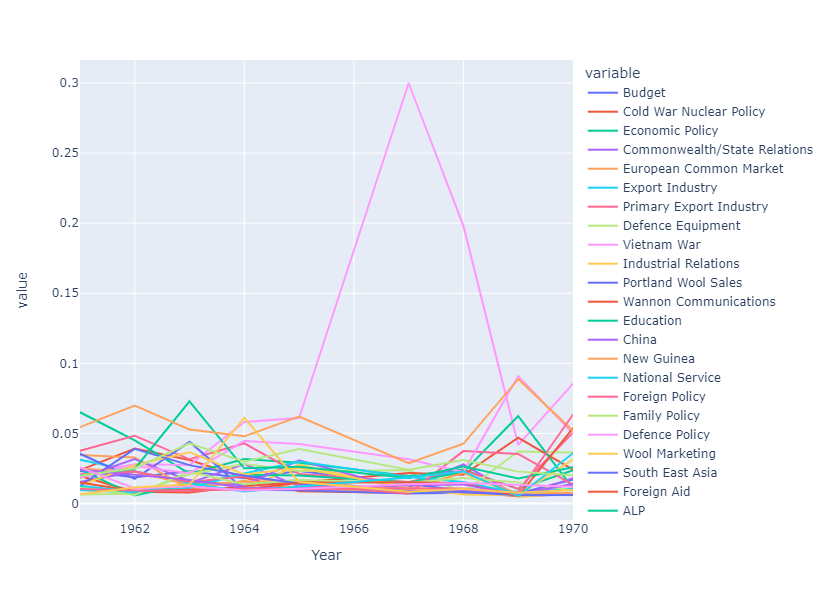

In [47]:
fig=px.line(df_dist_uniq_sig, x='Year', y=df_dist_uniq_sig.columns,height=600)
fig.show()

In [48]:
fig = go.Figure()
for column in df_level_2_dist:
    if column != 'Year':
        fig.add_trace(go.Scatter(x=df_level_2_dist["Year"], y=df_level_2_dist[column],
                        mode='lines',
                        name=column,))

for column in df_dist_uniq_sig:
    if column != 'Year':
        fig.add_trace(go.Scatter(x=df_dist_uniq_sig["Year"], y=df_dist_uniq_sig[column],
                        mode='lines',
                        name=column,))

In [49]:
print([True]*len(list(df_level_2_dist.columns) + list(df_dist_uniq_sig.columns)))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



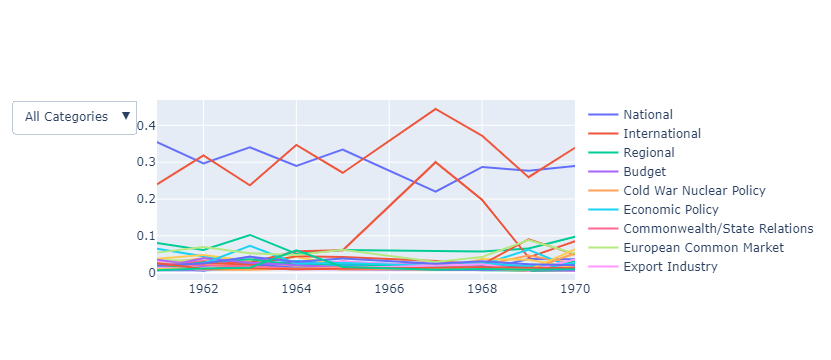

In [50]:
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All Categories',
                  method = 'update',
                  args = [{'visible': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]},
                          {'title': 'All Categories',
                           'showlegend':True}]),
            dict(label = 'Hierarchy-1',
                  method = 'update',
                  args = [{'visible': [True,True,True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]},
                          {'title': 'Hierarchy-1',
                           'showlegend':True}]),
             dict(label = 'Hierarchy-2',
                  method = 'update',
                  args = [{'visible': [False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Hierarchy-2',
                           'showlegend':True}]),
            ]),
        showactive=True,
        )
    ])

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



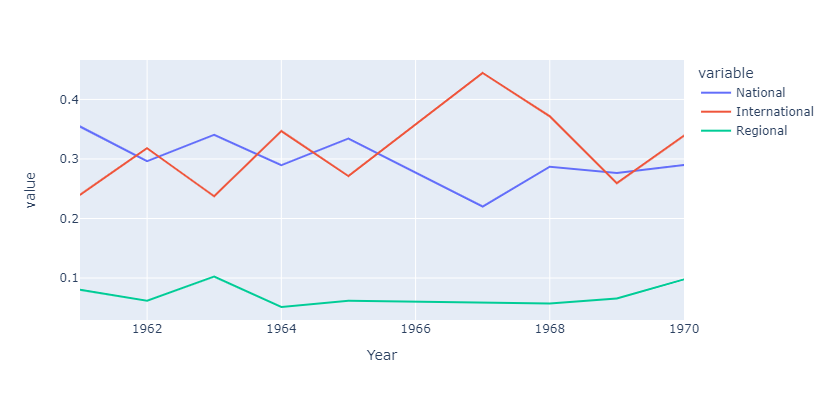

In [59]:
fig=px.line(df_level_2_dist, x='Year', y=df_level_2_dist.columns,height=400,width=700)
fig.show()

In [60]:
py.plot(fig, filename = 'Hierarchy_Policy', auto_open=True)

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/45/'

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



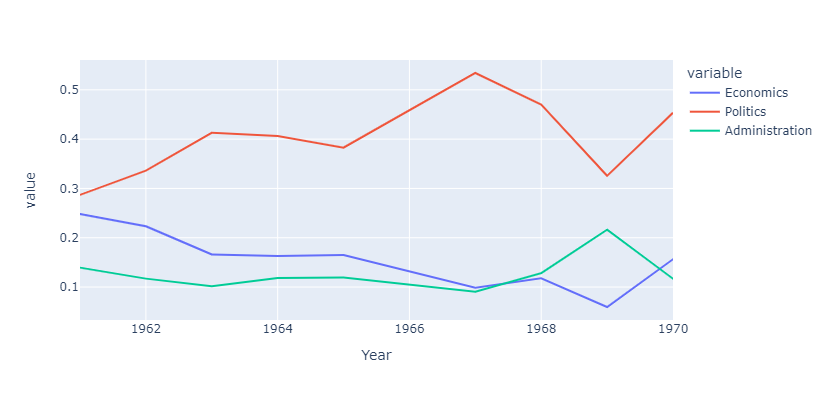

In [57]:
fig=px.line(df_level_2_dist_theme, x='Year', y=df_level_2_dist_theme.columns,height=400,width=700)
fig.show()

In [58]:
py.plot(fig, filename = 'Hierarchy_Theme_Line', auto_open=True)

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/conda/lib/python3.9/site-packages/plotly/version.py:18: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



'https://plotly.com/~kabirmanandharsth/47/'